In [0]:
# Code to read csv file into Colaboratory:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pandas import Series
from numpy.random import randn

In [0]:
link = 'https://drive.google.com/open?id=1hGMPRpSmEEGzBhar7j2gVmgp05H_-EJL'

In [131]:
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('affairs.csv')  
data = pd.read_csv('affairs.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [132]:
Data = data.select_dtypes(include=["int32","int64","float32","float64"])
Data = Data.dropna(axis=0)


Train = Data[:int(0.7*len(Data))]
Test = Data[int(0.7*len(Data)):]

Y = Train["affair"]
Train = Train.drop(['affair'],axis = 1).copy()
Y.shape
Train
Y = np.array(Y)
Y.shape
Y = np.reshape(Y,[len(Y),1])

print(X.shape,Y.shape)

(4456, 9) (4456, 1)


In [133]:

Train.shape


(4456, 9)

In [0]:
X = Train
SelectedFeatures = X.columns.values.tolist()

X = np.array(X)

for i in range(len(X.T)):
  X.T[i] = X.T[i] + 1

(4456, 9)

In [0]:
# z = np.dot(x,m)
def sigmoid(m,x):
  return 1/(1+np.exp(-(np.dot(x,m))))

def costfunction(m,x,y):
  return np.mean((1/(1+np.exp(np.dot(x,m)))-y)**2)

def derivateofslope(m,x,y):
  return np.mean(x*(y-(1/(1+np.exp(np.dot(x,m))))))



In [0]:
import matplotlib.pyplot as plt
def gradientdescent(lr,m,x,y,iteration):
  error = []
  for i in range(iteration):
#     print(m)
#     cost = costfunction(m,x,y)
#     print(cost)
    m = m - (lr*derivateofslope(m,x,y))
#     print(m)
#     print(derivateofslope(m,x,y))
    #c = c-lr * derivativeofintercept(m,X,Y)
    cost = costfunction(m,x,y)
    #print(cost)
    error.append(cost)
    if(i%10==0):
      print("error: ",error[i],"iteration: ",i)
  plt.plot(error)
  plt.show()
  return cost




error:  0.25053893743296907 iteration:  0
error:  0.2505140564123751 iteration:  10
error:  0.250490861623257 iteration:  20
error:  0.250469238710267 iteration:  30
error:  0.250449081064398 iteration:  40
error:  0.250430289300695 iteration:  50
error:  0.25041277077075375 iteration:  60
error:  0.2503964391077573 iteration:  70
error:  0.25038121380193284 iteration:  80
error:  0.2503670198044466 iteration:  90
error:  0.25035378715786927 iteration:  100
error:  0.25034145065146785 iteration:  110
error:  0.2503299494996839 iteration:  120
error:  0.2503192270422641 iteration:  130
error:  0.2503092304646074 iteration:  140
error:  0.25029991053698236 iteration:  150
error:  0.2502912213713585 iteration:  160
error:  0.25028312019467336 iteration:  170
error:  0.25027556713743604 iteration:  180
error:  0.2502685250366391 iteration:  190
error:  0.25026195925201744 iteration:  200
error:  0.25025583749475755 iteration:  210
error:  0.25025012966781796 iteration:  220
error:  0.25024

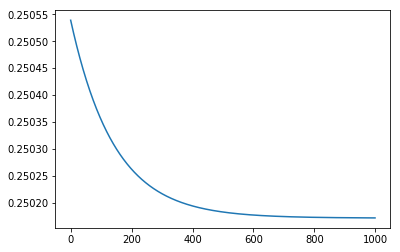

0.2501714752708649

In [166]:
lr = 0.00002
iteration = 1000
m = np.random.randn((len(X.T)),1)/1000
#c = np.random.randn()
gradientdescent(lr,m,X,Y,iteration)

In [163]:
error = costfunction(m,X,Y)
error
acc = 100 - (error/np.mean(Y**2))*100
# # print(acc.shape)
print("Accuracy: ",acc,"%")

Accuracy:  45.71842183625407 %
